Decision tree for income.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from matplotlib import style
from matplotlib import pyplot as plt
#import graphviz as gr
%matplotlib inline
style.use("fivethirtyeight")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 60)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

In [ ]:
import pandas as pd
import numpy as np
income=pd.read_csv("/content/drive/MyDrive/DataMining/Files/income.csv")
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  high_income     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
income.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# checking " ?" values, how many are there in the whole dataset
df_missing = (income ==' ?').sum()
df_missing

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
high_income          0
dtype: int64

Detect missing values and label them as NaN

In [ ]:
# Find which categorical attributes contain any missing value label
for col in income:
    ser = pd.Series(income[col])   # convert attribute/column to series
    if ser.isin([' ?']).any():
        print(col, income[col].dtype)

workclass object
occupation object
native_country object


In [ ]:
# Find frequency counts for all categorical attributes/coulumns
for col in income:
    if income[col].dtype == 'object':
        print(income[col].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [ ]:
# dropping the rows having missing values in workclass
income = income[income['workclass'] !=' ?']
income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# dropping the "?"s from occupation and native.country
income = income[income['occupation'] !=' ?']
income = income[income['native_country'] !=' ?']
income

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# check the dataset whether cleaned or not?
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  high_income     30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
from sklearn import preprocessing

# encode categorical variables using label Encoder

# select all categorical variables
info_categorical = income.select_dtypes(include=['object'])
info_categorical.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,high_income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [ ]:
# apply label encoder to df_categorical
le = preprocessing.LabelEncoder()
info_categorical = info_categorical.apply(le.fit_transform)
info_categorical.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,high_income
0,5,9,4,0,1,4,1,38,0
1,4,9,2,3,0,4,1,38,0
2,2,11,0,5,1,4,1,38,0
3,2,1,2,5,0,2,1,38,0
4,2,9,2,9,5,2,0,4,0


In [ ]:
# Next, Concatenate info_categorical dataframe with original info (dataframe)

# first, Drop earlier duplicate columns which had categorical values
income = income.drop(info_categorical.columns,axis=1)
income = pd.concat([income,info_categorical],axis=1)
income.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,high_income
0,39,77516,13,2174,0,40,5,9,4,0,1,4,1,38,0
1,50,83311,13,0,0,13,4,9,2,3,0,4,1,38,0
2,38,215646,9,0,0,40,2,11,0,5,1,4,1,38,0
3,53,234721,7,0,0,40,2,1,2,5,0,2,1,38,0
4,28,338409,13,0,0,40,2,9,2,9,5,2,0,4,0


In [ ]:
# recheck at column type
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education_num   30162 non-null  int64
 3   capital_gain    30162 non-null  int64
 4   capital_loss    30162 non-null  int64
 5   hours_per_week  30162 non-null  int64
 6   workclass       30162 non-null  int64
 7   education       30162 non-null  int64
 8   marital_status  30162 non-null  int64
 9   occupation      30162 non-null  int64
 10  relationship    30162 non-null  int64
 11  race            30162 non-null  int64
 12  sex             30162 non-null  int64
 13  native_country  30162 non-null  int64
 14  high_income     30162 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [ ]:
#Since here we have high_income as target/predicted variable we can see it's showing integer though we need to figure out labelled as <=50𝐾 𝑎𝑛𝑑 >50K and >50K as categorical.
# Let's convert target class/variable int32 to categorical( labelled as <=50𝐾𝑎𝑛𝑑>50Kand>50K)

# convert target variable high_income to categorical
income['high_income'] = income['high_income'].astype('category')

In [ ]:
# check income info again whether everything is in right format or not
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   fnlwgt          30162 non-null  int64   
 2   education_num   30162 non-null  int64   
 3   capital_gain    30162 non-null  int64   
 4   capital_loss    30162 non-null  int64   
 5   hours_per_week  30162 non-null  int64   
 6   workclass       30162 non-null  int64   
 7   education       30162 non-null  int64   
 8   marital_status  30162 non-null  int64   
 9   occupation      30162 non-null  int64   
 10  relationship    30162 non-null  int64   
 11  race            30162 non-null  int64   
 12  sex             30162 non-null  int64   
 13  native_country  30162 non-null  int64   
 14  high_income     30162 non-null  category
dtypes: category(1), int64(14)
memory usage: 3.5 MB


Model Building and Evaluation
Let's first build a decision tree with default hyperparameters. Then we'll use cross-validation to tune them.

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Putting independent variables/features to X
X = income.drop('high_income',axis=1)

# Putting response/dependent variable/feature to y
y = income['high_income']

In [ ]:
X.head(3)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,39,77516,13,2174,0,40,5,9,4,0,1,4,1,38
1,50,83311,13,0,0,13,4,9,2,3,0,4,1,38
2,38,215646,9,0,0,40,2,11,0,5,1,4,1,38


In [ ]:
y.head(3)

0    0
1    0
2    0
Name: high_income, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)

X_train.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country
24363,28,31493,13,0,0,40,2,9,4,2,3,4,1,38
15648,26,93806,10,0,0,55,4,15,2,11,0,4,1,38
4445,57,52267,14,0,0,50,1,12,2,3,0,4,1,38
23991,62,345780,11,0,0,40,2,8,0,7,1,4,1,38
26857,47,102628,14,15024,0,55,2,12,2,3,0,4,1,38


In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6813
           1       0.77      0.50      0.60      2236

    accuracy                           0.84      9049
   macro avg       0.81      0.72      0.75      9049
weighted avg       0.83      0.84      0.83      9049



In [ ]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6488  325]
 [1126 1110]]
0.8396507901425572


In [ ]:
# We need the graphviz library to plot a tree

!pip install pydotplus

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [ ]:
# Putting features
features = list (income.columns[1:])
features

['fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'high_income']

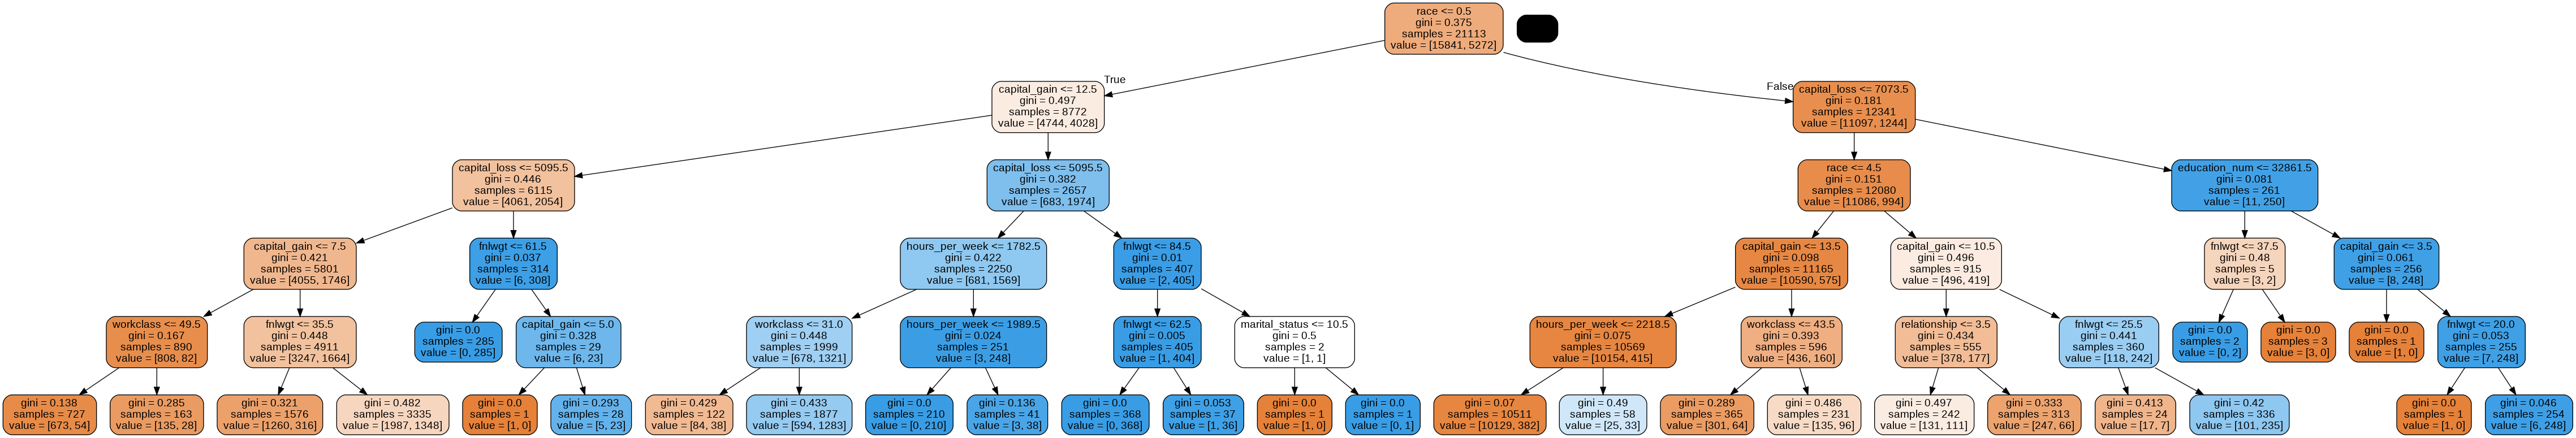

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The default tree is quite complex, and we need to simplify it by tuning the hyperparameters

Tuning max_depth
Let's first try to find the optimum values for max_depth and understand how the value of max_depth affects the decision tree.

Here, we are creating a dataframe with max_depth in range 1 to 80 and checking the accuracy score corresponding to each max_depth.

In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022291,0.005857,0.004515,0.000219,1,{'max_depth': 1},0.750178,0.750178,0.750414,0.750355,0.750355,0.750296,0.000099,39
1,0.026054,0.001628,0.004160,0.000377,2,{'max_depth': 2},0.826427,0.817192,0.821217,0.822596,0.826386,0.822763,0.003464,16
2,0.041837,0.008621,0.004279,0.000325,3,{'max_depth': 3},0.839924,0.830452,0.836609,0.837518,0.840597,0.837020,0.003599,11
3,0.062124,0.005504,0.005938,0.002386,4,{'max_depth': 4},0.846555,0.834478,0.839451,0.845097,0.847466,0.842609,0.004928,9
4,0.055936,0.005666,0.005506,0.001988,5,{'max_depth': 5},0.849396,0.836609,0.843476,0.850782,0.849597,0.845972,0.005327,6


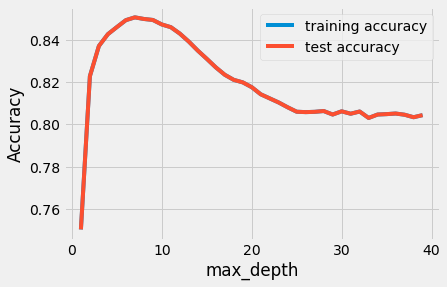

In [ ]:
#plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min_samples_leaf
The hyperparameter min_samples_leaf indicates the minimum number of samples required to be at a leaf.

So if the values of min_samples_leaf is less, say 5, then the will be constructed even if a leaf has 5, 6 etc. observations (and is likely to overfit).

Let's see what will be the optimum value for min_samples_leaf.


In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.089672,0.004405,0.004493,0.000632,5,{'min_samples_leaf': 5},0.829031,0.820744,0.825716,0.829938,0.831833,0.827453,0.003896,10
1,0.073691,0.001183,0.003743,0.000609,25,{'min_samples_leaf': 25},0.848686,0.838740,0.851054,0.851018,0.849360,0.847772,0.004610,4
2,0.066327,0.001994,0.003234,0.000024,45,{'min_samples_leaf': 45},0.849159,0.841345,0.852238,0.848650,0.845334,0.847345,0.003714,5
3,0.060660,0.001002,0.003232,0.000121,65,{'min_samples_leaf': 65},0.855553,0.842529,0.852711,0.851018,0.847703,0.849903,0.004478,2
4,0.059629,0.001857,0.003197,0.000042,85,{'min_samples_leaf': 85},0.854606,0.843713,0.855079,0.849834,0.846518,0.849950,0.004442,1


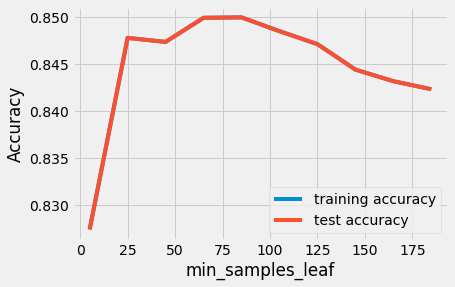

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min_samples_split
The hyperparameter min_samples_split is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.096140,0.003453,0.004243,0.000135,5,{'min_samples_split': 5},0.806536,0.810324,0.811035,0.811937,0.817148,0.811396,0.003414,10
1,0.088092,0.002334,0.003784,0.000280,25,{'min_samples_split': 25},0.834241,0.829979,0.837083,0.835623,0.834912,0.834368,0.002388,9
2,0.086523,0.002936,0.003431,0.000112,45,{'min_samples_split': 45},0.841819,0.838977,0.845844,0.842255,0.837518,0.841282,0.002882,8
3,0.082860,0.000492,0.003394,0.000083,65,{'min_samples_split': 65},0.842055,0.840161,0.849159,0.848887,0.844387,0.844930,0.003601,7
4,0.097482,0.036274,0.004222,0.001800,85,{'min_samples_split': 85},0.848449,0.842766,0.851527,0.849360,0.845097,0.847440,0.003122,6


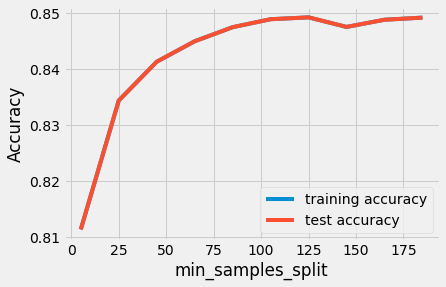

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, I shall also specify the criterion (gini/entropy or IG)

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.042292,0.001283,0.003049,0.000066,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.851291,0.837083,0.841108,0.845808,0.846518,0.844361,0.004865,13
1,0.043239,0.001953,0.003011,0.000044,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.851291,0.837083,0.841108,0.845808,0.846518,0.844361,0.004865,13
2,0.042038,0.002517,0.002985,0.000074,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.847502,0.836609,0.842055,0.845808,0.846281,0.843651,0.003963,15
3,0.042339,0.002139,0.003290,0.000614,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.847502,0.836609,0.842055,0.845808,0.846281,0.843651,0.003963,15
4,0.067556,0.002531,0.003396,0.000387,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.852711,0.839451,0.849633,0.844150,0.843913,0.845971,0.004667,7
5,0.066829,0.000707,0.003197,0.000065,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.852711,0.839451,0.849633,0.844150,0.843913,0.845971,0.004667,7
6,0.063523,0.002769,0.003198,0.000071,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.853185,0.840398,0.848212,0.851492,0.842492,0.847156,0.004974,3
7,0.062740,0.001845,0.003229,0.000152,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.853185,0.840398,0.848212,0.851492,0.842492,0.847156,0.004974,3
8,0.034466,0.000326,0.003046,0.000099,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.849396,0.836372,0.843239,0.850071,0.848176,0.845451,0.005131,9
9,0.034639,0.000309,0.003082,0.000147,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.849396,0.836372,0.843239,0.850071,0.848176,0.845451,0.005131,9


In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8477714525573508
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [ ]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8453972814675654

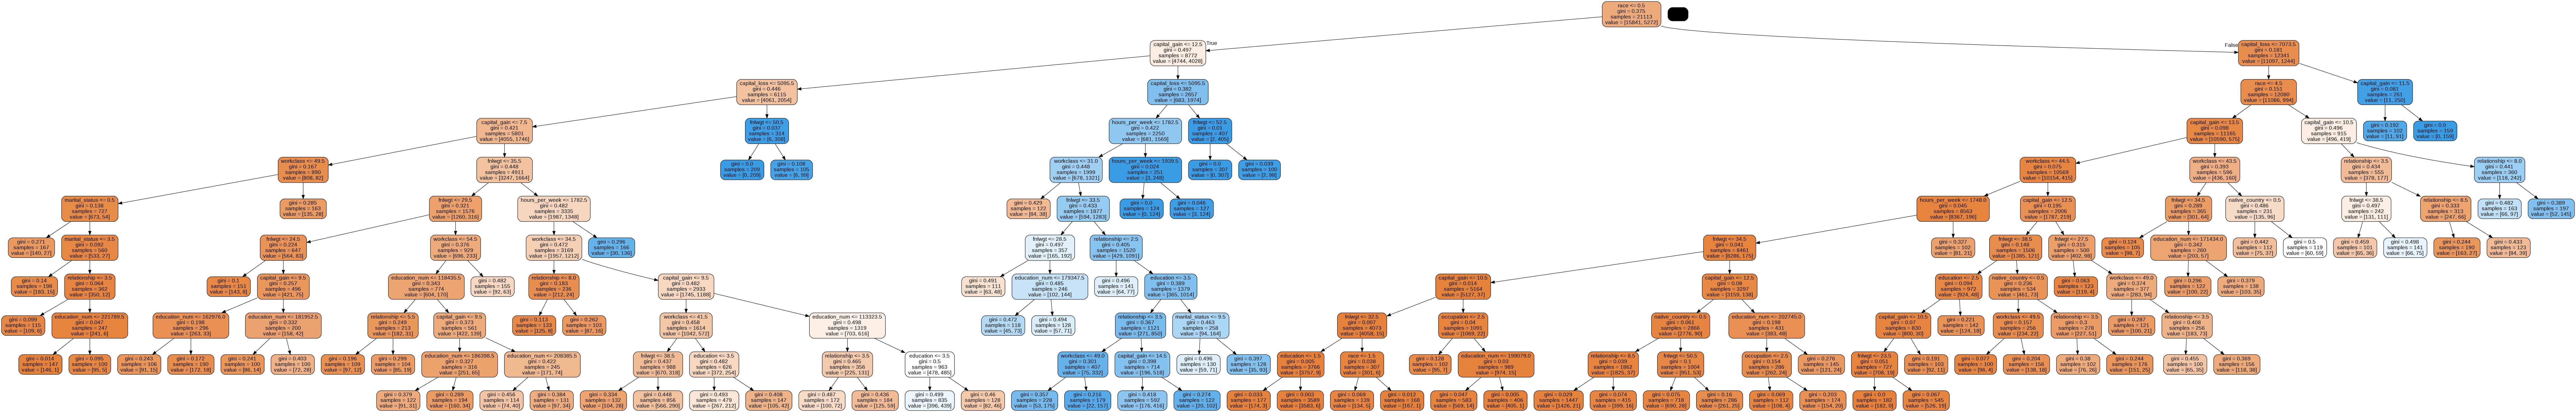

In [ ]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8331307326776439


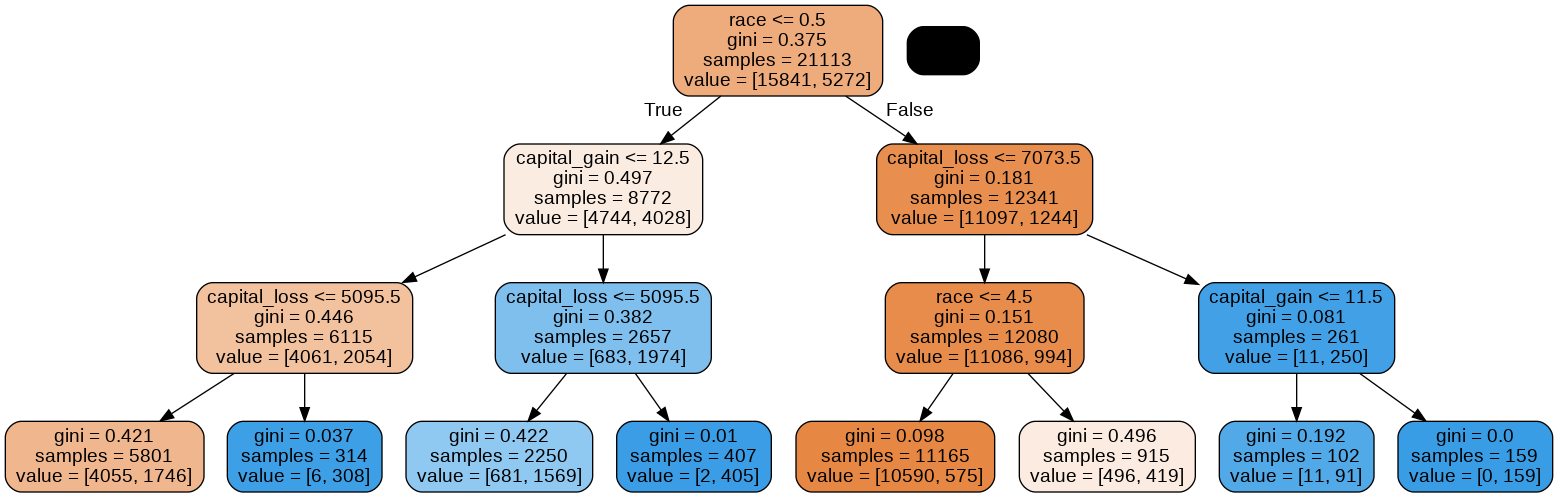

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      6813
           1       0.77      0.46      0.58      2236

    accuracy                           0.83      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.83      0.82      9049



In [ ]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6502  311]
 [1199 1037]]
